In [5]:
import pandas as pd 
df1=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Data cleaning
## 1)What is the structure and shape of the dataset?

In [3]:
import pandas as pd 
df1=pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
df1.shape
df1.info()
df1.head()
print(df1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...

## 2)What are the data types of each column?


In [4]:
df1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 3) Which columns have missing values, and how can they be imputed?


In [6]:
import pandas as pd
print("Missing values in each column:")
print(df1.isnull().sum())
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
df1['Cabin'] = df1['Cabin'].fillna("Unknown")
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])
df1['Fare'] = df1['Fare'].fillna(df1.groupby('Pclass')['Fare'].transform('median'))
print("\nMissing values after imputation:")
print(df1.isnull().sum())
df1.to_csv("Titanic_cleaned.csv", index=False)
print("\nCleaned file saved as Titanic_cleaned.csv")


Missing values in each column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Cleaned file saved as Titanic_cleaned.csv


## 4)Are there any outliers (Age, Fare)? If yes, how do we treat them?


In [7]:
import pandas as pd
def get_outlier_limits(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper
age_lower, age_upper = get_outlier_limits(df1['Age'].dropna())
print("Age Outlier Limits:")
print("Lower:", age_lower, " Upper:", age_upper)

print("Age Outliers Count:",
      ((df1['Age'] < age_lower) | (df1['Age'] > age_upper)).sum())
fare_lower, fare_upper = get_outlier_limits(df1['Fare'])
print("\nFare Outlier Limits:")
print("Lower:", fare_lower, " Upper:", fare_upper)

print("Fare Outliers Count:",
      ((df1['Fare'] < fare_lower) | (df1['Fare'] > fare_upper)).sum())
df1['Age']  = df1['Age'].clip(lower=age_lower,  upper=age_upper)
df1['Fare'] = df1['Fare'].clip(lower=fare_lower, upper=fare_upper)

print("\nOutliers treated using capping.")
print (df1[['Age', 'Fare']].describe())


Age Outlier Limits:
Lower: -6.6875  Upper: 64.8125
Age Outliers Count: 0

Fare Outlier Limits:
Lower: -26.724  Upper: 65.6344
Fare Outliers Count: 0

Outliers treated using capping.
              Age        Fare
count  714.000000  891.000000
mean    29.622700   24.046813
std     14.316665   20.481625
min      0.420000    0.000000
25%     20.125000    7.910400
50%     28.000000   14.454200
75%     38.000000   31.000000
max     64.812500   65.634400


## Exploratory Data Analysis
## 5) What is the overall distribution of survivors vs non-survivors?


Survival Distribution (Count):
Survived
0    549
1    342
Name: count, dtype: int64

Survival Distribution (Percentage):
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


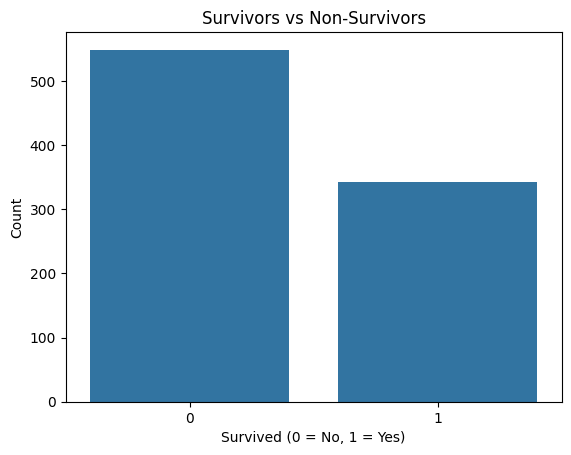

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
print("Survival Distribution (Count):")
print(df1['Survived'].value_counts())

print("\nSurvival Distribution (Percentage):")
print(df1['Survived'].value_counts(normalize=True) * 100)
sns.countplot(data=df1, x='Survived')
plt.title("Survivors vs Non-Survivors")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


## 6) How does survival differ by gender?


Survival Counts by Gender:
Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

Survival Percentage by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


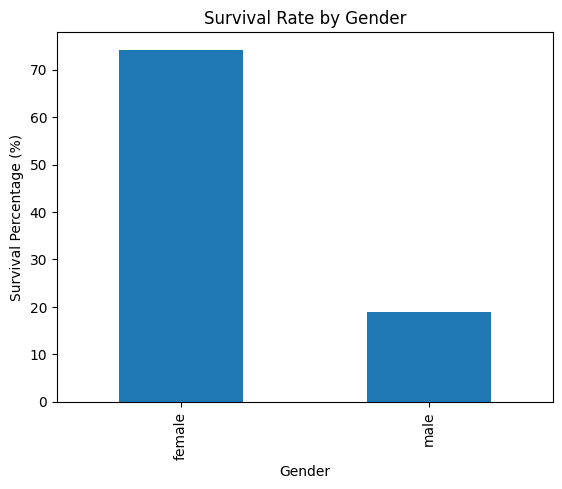

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
print("Survival Counts by Gender:")
print(df1.groupby('Sex')['Survived'].value_counts())
print("\nSurvival Percentage by Gender:")
print(df1.groupby('Sex')['Survived'].mean() * 100)
survival_gender = df1.groupby('Sex')['Survived'].mean() * 100
survival_gender.plot(kind='bar')
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Percentage (%)")
plt.xlabel("Gender")
plt.show()


# 6️)How does survival differ by gender?

Survival Percentage by Gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


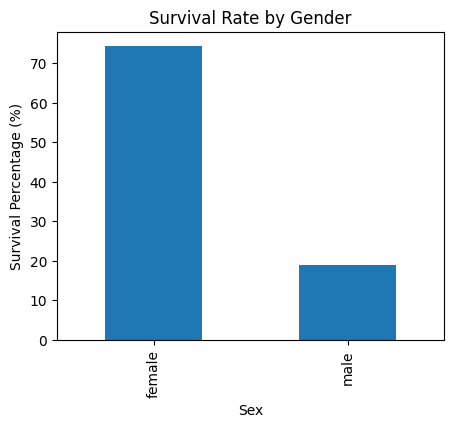

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
print("Survival Percentage by Gender:")
print(df.groupby("Sex")["Survived"].mean() * 100)

plt.figure(figsize=(5,4))
(df.groupby("Sex")["Survived"].mean() * 100).plot(kind="bar")
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Percentage (%)")
plt.show()


# 7)Survival across Passenger Classes (Pclass)


Survival Percentage by Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


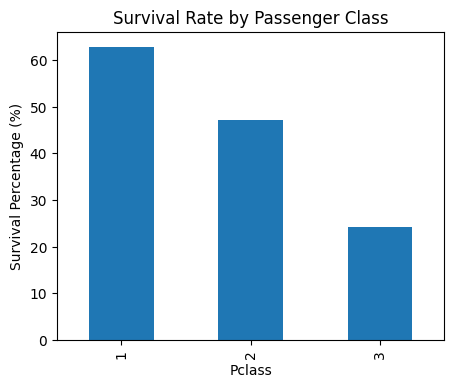

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
print("\nSurvival Percentage by Class:")
print(df.groupby("Pclass")["Survived"].mean() * 100)

plt.figure(figsize=(5,4))
(df.groupby("Pclass")["Survived"].mean() * 100).plot(kind="bar")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Percentage (%)")
plt.show()

# 8)Age distribution among all passengers

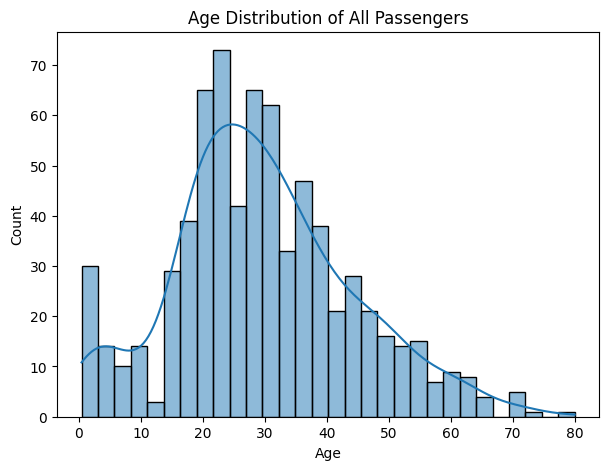

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
plt.figure(figsize=(7,5))
sns.histplot(df["Age"].dropna(), kde=True, bins=30)
plt.title("Age Distribution of All Passengers")
plt.xlabel("Age")
plt.show()

# 9) Compare Age distributions (Survived vs Not Survived)

C:\Users\rahul\AppData\Local\Temp\ipykernel_12960\584832264.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==1]["Age"].dropna(), shade=True, label="Survived")
C:\Users\rahul\AppData\Local\Temp\ipykernel_12960\584832264.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"]==0]["Age"].dropna(), shade=True, label="Not Survived")


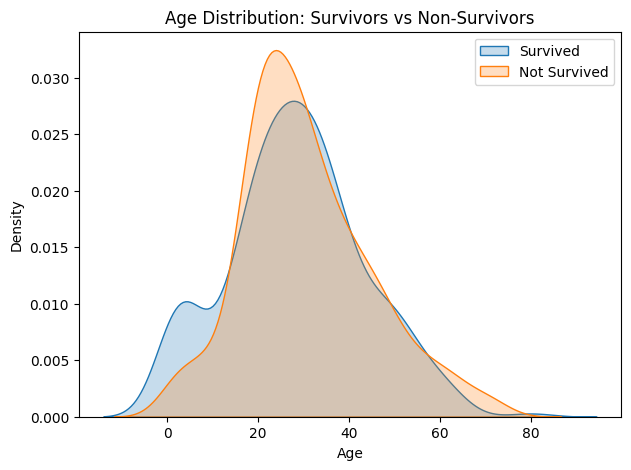

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
plt.figure(figsize=(7,5))
sns.kdeplot(df[df["Survived"]==1]["Age"].dropna(), shade=True, label="Survived")
sns.kdeplot(df[df["Survived"]==0]["Age"].dropna(), shade=True, label="Not Survived")
plt.title("Age Distribution: Survivors vs Non-Survivors")
plt.xlabel("Age")
plt.legend()
plt.show()

# 10)Ticket Fare distribution across classes

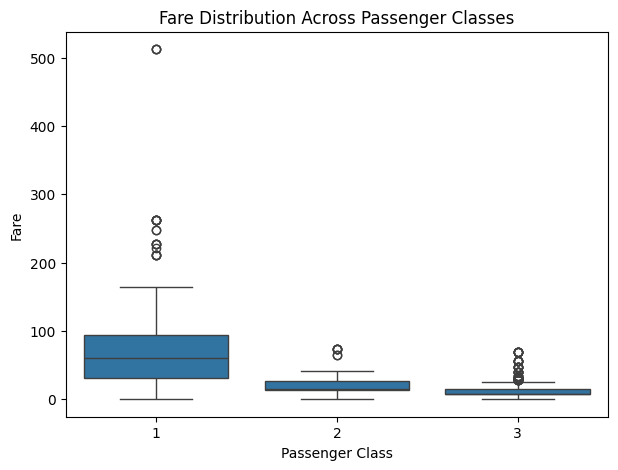

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
plt.figure(figsize=(7,5))
sns.boxplot(x="Pclass", y="Fare", data=df)
plt.title("Fare Distribution Across Passenger Classes")
plt.xlabel("Passenger Class")
plt.ylabel("Fare")
plt.show()

# 11)Embarked distribution (Which port had more passengers?)


Passenger count by Embarked Port:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


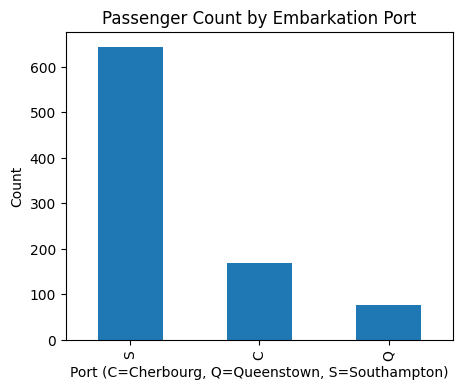

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
print("\nPassenger count by Embarked Port:")
print(df["Embarked"].value_counts())
plt.figure(figsize=(5,4))
df["Embarked"].value_counts().plot(kind="bar")
plt.title("Passenger Count by Embarkation Port")
plt.xlabel("Port (C=Cherbourg, Q=Queenstown, S=Southampton)")
plt.ylabel("Count")
plt.show()

## 12) Correlation heatmap for numerical variables

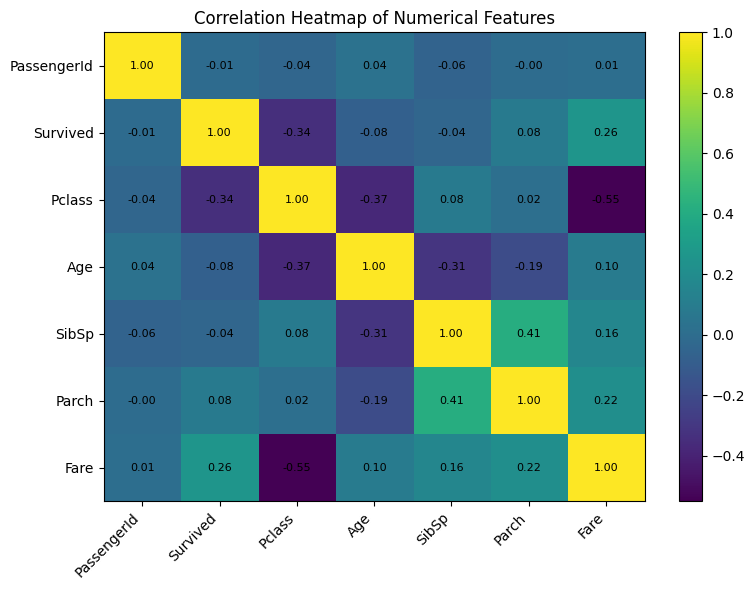

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
num_df = df.select_dtypes(include=["number"])
corr = num_df.corr()
plt.figure(figsize=(8,6))
im = plt.imshow(corr, aspect='auto')
plt.colorbar(im)
ticks = np.arange(len(corr.columns))
plt.xticks(ticks, corr.columns, rotation=45, ha='right')
plt.yticks(ticks, corr.columns)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", ha='center', va='center', fontsize=8)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()


# 13)Family Size = SibSp + Parch + 1  → survival impact

Survival rate by Family Size (%):
FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


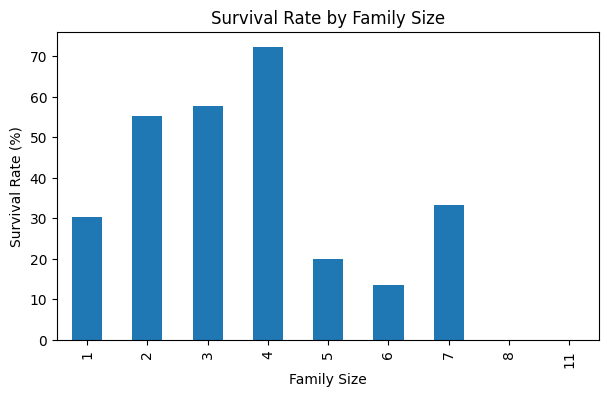

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
survival_family = df.groupby('FamilySize')['Survived'].mean() * 100
print("Survival rate by Family Size (%):")
print(survival_family)
plt.figure(figsize=(7,4))
survival_family.plot(kind='bar')
plt.title("Survival Rate by Family Size")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate (%)")
plt.show()

# 14)Create an IsAlone feature and analyze survival impact.

Survival Rate by IsAlone (%):
IsAlone
0    50.56
1    30.35
Name: Survived, dtype: float64


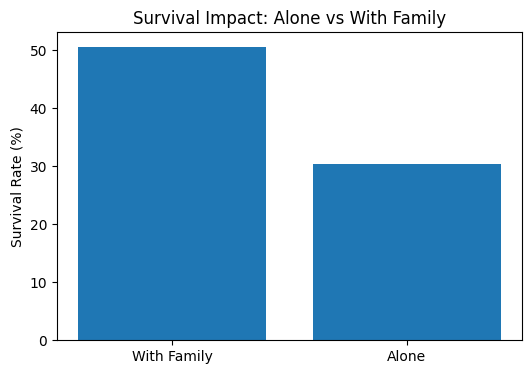

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:\\Users\\rahul\\OneDrive\\Desktop\\python\\DataAnalytics\\Titanic-Dataset.csv")

# Create FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Create IsAlone (1 = Alone, 0 = With Family)
df["IsAlone"] = (df["FamilySize"] == 1).astype(int)

# Survival rate (%) by IsAlone
survival_rate = df.groupby("IsAlone")["Survived"].mean() * 100

print("Survival Rate by IsAlone (%):")
print(survival_rate.round(2))

# Make labels readable
labels = ["With Family", "Alone"]  # 0 → With Family, 1 → Alone
values = survival_rate.values

# -----------------------------
# Plot (Matplotlib)
# -----------------------------
plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylabel("Survival Rate (%)")
plt.title("Survival Impact: Alone vs With Family")
plt.show()


# 15)Extract Title from Name and analyze survival differences.

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\rahul\AppData\Local\Temp\ipykernel_12960\907952603.py:4: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')


Survival Rate by Title (%):
Title
Capt          0.000000
Col          50.000000
Countess    100.000000
Don           0.000000
Dr           42.857143
Jonkheer      0.000000
Lady        100.000000
Major        50.000000
Master       57.500000
Miss         69.780220
Mlle        100.000000
Mme         100.000000
Mr           15.667311
Mrs          79.200000
Ms          100.000000
Rev           0.000000
Sir         100.000000
Name: Survived, dtype: float64


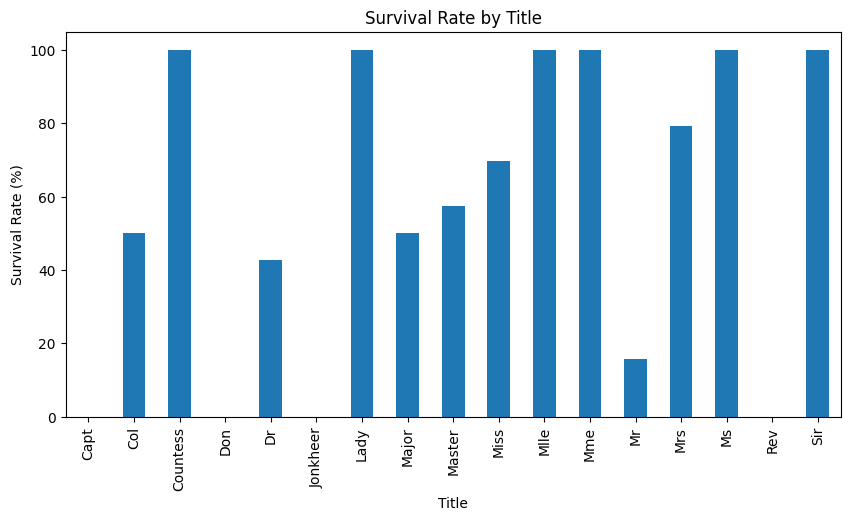

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')

# Survival rate by title
survival_title = df.groupby('Title')['Survived'].mean() * 100
print("Survival Rate by Title (%):")
print(survival_title)

# Plot
plt.figure(figsize=(10,5))
survival_title.plot(kind='bar')
plt.title("Survival Rate by Title")
plt.xlabel("Title")
plt.ylabel("Survival Rate (%)")
plt.show()

# 16)Group passengers into Age categories and analyze survival.

Survival Rate by Age Group (%):
AgeGroup
Child         57.971014
Teen          41.052632
Adult         38.759690
Middle-Age    39.416058
Senior        26.923077
Name: Survived, dtype: float64


C:\Users\rahul\AppData\Local\Temp\ipykernel_12960\859146444.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_agegroup = df.groupby('AgeGroup')['Survived'].mean() * 100


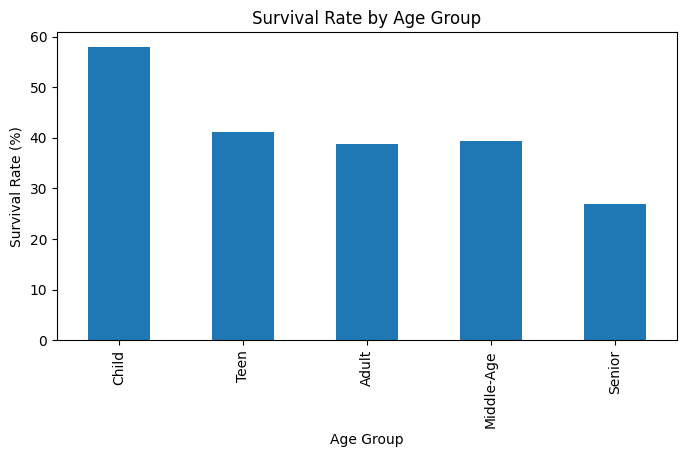

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\python\DataAnalytics\Titanic-Dataset.csv")
bins = [0, 12, 19, 39, 59, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle-Age', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, include_lowest=True)

# Survival rate by Age Group
survival_agegroup = df.groupby('AgeGroup')['Survived'].mean() * 100
print("Survival Rate by Age Group (%):")
print(survival_agegroup)

# Plot
plt.figure(figsize=(8,4))
survival_agegroup.plot(kind='bar')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.show()